#Quiz Question 1#
To minimize:
$$
\sum_{i=1}^n (Y_i - \beta_1 X_{i1} - \beta_2 X_i2 - ... - \beta_p X_{ip})^2.
$$
We can break up the sum since each $X_{ik}$ is of the form $X_{ik} = I(i \in G_k)$:
$$
\sum_{i \in G_1} (Y_i - \beta_1 X_{i1})^2+\sum_{i \in G_2} (Y_i - \beta_2 X_{i2})^2 + ... + \sum_{i \in G_p} (Y_i - \beta_p X_{ip})^2
$$
We can assign all $X_i$ as 1:
$$
\sum_{i \in G_1} (Y_i - \beta_1)^2+\sum_{i \in G_2} (Y_i - \beta_2)^2 + ... + \sum_{i \in G_p} (Y_i - \beta_p)^2
$$
We can represent the kth group as:
$$\sum_{i \in G_k} (Y_i - \beta_k)^2$$
Then, differentiate with respect to $B_k$:
$$\sum_{i \in G_k} (-2)(Y_i - \beta_k) = 0$$
$$\sum_{i \in G_k} (Y_i - \beta_k) = 0$$
$$(\sum_{i \in G_k}Y_i) - \beta_k \sum_{i \in G_k}1= 0$$
$$\hat{\beta_k} = \frac{\sum_{i \in G_k}Y_i}{\sum_{i \in G_k}1}$$
$$\hat{\beta_k} = \frac{\sum_{i \in G_k}Y_i}{n_k}$$
$$ \hat{\beta_k}= \frac{\sum_{i \in G_k}Y_i}{n_k}=\bar{Y}^{(k)}$$


In [7]:
#Quiz Question 2

import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

! if [ ! -e kirby21.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi
  
df = pd.read_csv("/content/kirby21.csv")
df.head(5)


,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


beta0 is -694.18
beta1 is 1.07
in sample error rate is 832740.30


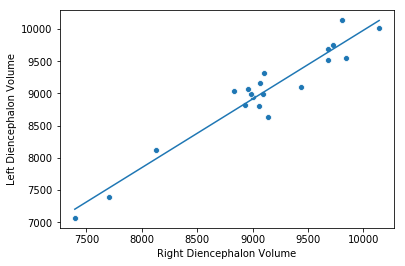

In [24]:
#Quiz Question 2 continued
DL = df[df['roi'] == 'Diencephalon_L']
DL = DL[DL['type'] == 1]
DL = DL[DL['level'] == 1]
DR = df[df['roi'] == 'Diencephalon_R']
DR = DR[DR['type'] == 1]
DR = DR[DR['level'] == 1]
yval = DL['volume'].values
xval = DR['volume'].values

sns.scatterplot(xval,yval)
plt.xlabel('Right Diencephalon Volume')
plt.ylabel('Left Diencephalon Volume')

def estimators(x,y):
  beta1 = st.pearsonr(xval, yval)[0] * np.std(yval) / np.std(xval)
  beta0 = np.mean(yval) - np.mean(xval) * beta1
  return beta0, beta1

beta0, beta1 = estimators(xval,yval)
print('beta0 is %.2f'%(beta0))
print('beta1 is %.2f'%(beta1))

sns.lineplot(xval, beta0 + beta1 * xval)

in_sample_error = 0
for i in range(len(xval)):
  in_sample_error = in_sample_error + (yval[i] - beta0 - beta1*xval[i])**2

in_sample_error = np.sum(in_sample_error)

print('in sample error rate is %.2f'%(in_sample_error))

#Quiz Question 3#

I'd be interested in predicting or classifying air pollution outcomes. Specifically, I will look at the short-term effects of ambient air pollution on daily mortality.